In [2]:
# To get the the SQL data, setting the SQL module
import os
import sqlite3
import pandas as pd

In [3]:
# Creae example.db if it exists
if os.path.exists('example.db'):
    os.remove('example.db')

In [4]:
# Create a database
conn = sqlite3.connect('example.db')

In [5]:
# Load some csv data
visits = pd.read_csv('visits.csv')
fitness_tests = pd.read_csv('fitness_tests.csv')
applications = pd.read_csv('applications.csv')
purchases = pd.read_csv('purchases.csv')

In [6]:
# Add the data to our database
visits.to_sql('visits', conn, dtype ={
    'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'visits_date':'DATE'
})
fitness_tests.to_sql ('fitness_tests', conn, dtype = {
    'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'gender': 'VARCHAR(256)',
    'fitness_test_date':'DATE'
})
applications.to_sql ('applications', conn, dtype = {
    'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'gender': 'VARCHAR(256)',
    'application_date':'DATE'
})
purchases.to_sql ('purchases', conn, dtype = {
     'firt_name':'VARCHAR(256)',
    'last_naem':'VARCHAR(256)',
    'email':'VARCHAR(256)',
    'gender': 'VARCHAR(256)',
    'purchases_date':'DATE'
})

In [7]:
# Make a funciton for running SQL queries
def sql_query(query):
    try:
        df = pd.read_sql(query, conn)
    except Exception as e:
        print(e.message)
    return df

In [8]:
# Test the Query 
sql_query('SELECT * FROM visits LIMIT 5')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [9]:
# Test to save the data to a DataFrame
df = sql_query('''
SELECT *
FROM visits 
LIMIT 5
''')

In [10]:
print(df)

   index first_name last_name                          email  gender  \
0      0      Karen   Manning        Karen.Manning@gmail.com  female   
1      1    Annette     Boone               AB9982@gmail.com  female   
2      2   Salvador   Merritt  SalvadorMerritt12@outlook.com    male   
3      3     Martha   Maxwell       Martha.Maxwell@gmail.com  female   
4      4      Andre     Mayer         AndreMayer90@gmail.com    male   

  visit_date  
0     5-1-17  
1     5-1-17  
2     5-1-17  
3     5-1-17  
4     5-1-17  


In [11]:
# Examime visits db
sql_query("""
SELECT *
FROM visits
LIMIT 5;
""")

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [12]:
# Examine fitness_tests db
sql_query("""
SELECT *
FROM fitness_tests
LIMIT 5;
""")

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [13]:
# Examine applications db
sql_query("""
SELECT *
FROM applications
LIMIT 5;
""")

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [14]:
# Examine purchases db
sql_query("""
SELECT *
FROM purchases
LIMIT 5;
""")

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


In [15]:
# Save all of db data to one DataFrame
# Let's pull data where visit_data is on or after 7-1-17
# Use 'Left Join' commands to combine the four tables
# Joins on 'first_name','last_name', 'email'

sql_query("""
SELECT *
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
LIMIT 5
""")

,index,first_name,last_name,email,gender,visit_date,index,first_name,last_name,email,...,last_name,email,gender,application_date,index,first_name,last_name,email,gender,purchase_date
0,1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17,0.0,Kim,Walter,KimWalter58@gmail.com,...,None,None,None,None,NaN,None,None,None,None,None
1,1001,Tom,Webster,TW3857@gmail.com,male,7-1-17,1.0,Tom,Webster,TW3857@gmail.com,...,None,None,None,None,NaN,None,None,None,None,None
2,1002,Edward,Bowen,Edward.Bowen@gmail.com,male,7-1-17,NaN,None,None,None,...,Bowen,Edward.Bowen@gmail.com,male,2017-07-04,39.0,Edward,Bowen,Edward.Bowen@gmail.com,male,2017-07-04
3,1003,Marcus,Bauer,Marcus.Bauer@gmail.com,male,7-1-17,2.0,Marcus,Bauer,Marcus.Bauer@gmail.com,...,Bauer,Marcus.Bauer@gmail.com,male,2017-07-03,22.0,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-05
4,1004,Roberta,Best,RB6305@hotmail.com,female,7-1-17,3.0,Roberta,Best,RB6305@hotmail.com,...,None,None,None,None,NaN,None,None,None,None,None


In [16]:
# Pull the some columns what we need to A/B Test and save it to one DataFrame
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')

In [17]:
# Invesetigate the A and B Groups
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
# Create new column to use A/B test 
# A: fitness_test_date is not None
# B: fitness_test_date is None
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notnull(x) else 'B')

In [19]:
# Calculate the number of A and B using group by
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts

,ab_test_group,first_name
0,A,2504
1,B,2500


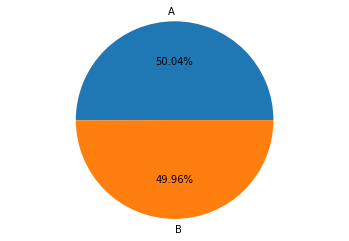

<Figure size 432x288 with 0 Axes>

In [20]:
# Create Pie chart 
plt.pie(ab_counts.first_name.values, labels=['A', 'B'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()
plt.savefig('ab_test_pie_chart.png')

In [21]:
# Analyze Application data
# Examine how many people make filling out an application.
# General, this is the sign-up process
# 1. Take a fitness teset with a personal trainner (Only group A)
# 2. Fill out an application for the gym
# 3. Send in theri payment for the thier first month's membership



In [47]:
# Create new column which called 'is_application' when application_date is not null
df['is_application'] = df.application_date.apply(lambda x: 'Application'if pd.notnull(x) else 'No Application')

In [48]:
# Let's count how many people are sign up application depends on the group
app_counts = df.groupby(['ab_test_group','is_application']).first_name.count().reset_index()

In [49]:
print(app_counts)

  ab_test_group  is_application  first_name
0             A     Application         250
1             A  No Application        2254
2             B     Application         325
3             B  No Application        2175


In [54]:
# Make a pivot table
app_pivot = app_counts.pivot(columns = 'is_application', index = 'ab_test_group', values ='first_name').reset_index()
app_pivot
#app_pivot.dtypes

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [56]:
# Add new column to show percent
app_pivot['Total'] = app_pivot.Application+ app_pivot['No Application']
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


In [57]:
# To check the percentage has the meaning, let's do hypothesis test
# The data is 2 or more, and categorical data, So we have to use Chi-Squared Test

In [58]:
from scipy.stats import chi2_contingency

In [59]:
contingency = [[250,2254],
               [325,2175]]
_, pval, _, _ = chi2_contingency(contingency)
print(pval)

0.0009647827600722304


In [60]:
# P-value is less than 0.05. This means that the difference is significant, and the people in Group B has more chance to sign up the gym

In [61]:
# of those who picked up an application, how many purchased a membership?

In [62]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'Not member')

In [63]:
# Create a DataFrame to contain only people who picked up an application
only_apps = df[df.is_application=='Application']
only_apps

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not member
11,Valerie,Munoz,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member
...,...,...,...,...,...,...,...,...,...
4944,Frances,Kerr,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Application,Member
4964,Raymond,Cantrell,9-9-17,None,2017-09-13,2017-09-18,B,Application,Member
4972,Roberta,Acevedo,9-9-17,None,2017-09-15,2017-09-16,B,Application,Member
4991,Suzanne,Humphrey,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Application,Member


In [64]:
# Let's make a group who apply membership or not based on the group A or B
member_count = only_apps.groupby(['ab_test_group','is_member']).first_name.count().reset_index()
member_count

,ab_test_group,is_member,first_name
0,A,Member,200
1,A,Not member,50
2,B,Member,250
3,B,Not member,75


In [66]:
# Make it as pivot table
member_pivot = member_count.pivot(columns = 'is_member', index = 'ab_test_group', values = 'first_name')
member_pivot

is_member,Member,Not member
ab_test_group,,
A,200,50
B,250,75


In [68]:
# Add more information columns
member_pivot['Total'] = member_pivot.Member + member_pivot['Not member']
member_pivot['Percent Membership'] = member_pivot.Member / member_pivot.Total
member_pivot

is_member,Member,Not member,Total,Percent Membership
ab_test_group,,,,
A,200,50,250,0.800000
B,250,75,325,0.769231


In [71]:
# To see the significane of the Percent Memembership, Do Chi Square Hypothesis test
contingency2 = [[200,50],
                [250,75]]
_, pval2, _, _ = chi2_contingency(contingency2)
print (pval2)

0.43258646051083327


In [72]:
# P-value is higher than 0.05, which means there is no differnece between two groups

In [73]:
# The previous analysis was based on the people who picked up applicaiton purchase membership.
# Let's analysis all visitors' percentage of puchasing membership


In [74]:
all_visitor_membership_count = df.groupby(['ab_test_group','is_member']).first_name.count().reset_index()
all_visitor_membership_count

,ab_test_group,is_member,first_name
0,A,Member,200
1,A,Not member,2304
2,B,Member,250
3,B,Not member,2250


In [80]:
# Make pivot table
all_visitor_membership_pivot = all_visitor_membership_count.pivot(columns = 'is_member', index='ab_test_group', values = 'first_name').reset_index()
all_visitor_membership_pivot

is_member,ab_test_group,Member,Not member
0,A,200,2304
1,B,250,2250


In [81]:
# Make more columns to check percentage
all_visitor_membership_pivot['Total'] = all_visitor_membership_pivot.Member + all_visitor_membership_pivot['Not member']
all_visitor_membership_pivot['Percentage of Membership'] = all_visitor_membership_pivot.Member / all_visitor_membership_pivot.Total
all_visitor_membership_pivot

is_member,ab_test_group,Member,Not member,Total,Percentage of Membership
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


In [83]:
# Considering all visitor, Do Chi-Sqaure Hypothesis
contingency3 = [[200,2304],
                [250,2250]]
_, pval3, _, _ = chi2_contingency(contingency3)
print(pval3)

0.014724114645783203


In [84]:
# P value is less than 0.05. We can conclude that there be a significant different in membership between Group A and Group B

In [85]:
# Summarize the funnel with a chart

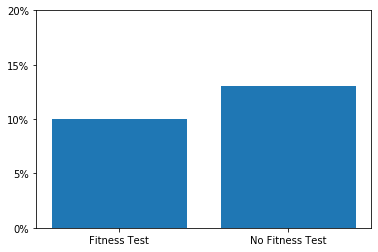

<Figure size 432x288 with 0 Axes>

In [93]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(app_pivot)),app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('Percent_of_visitors_apply_barchart.png')

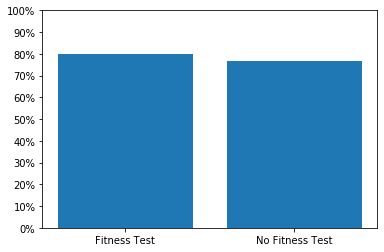

<Figure size 432x288 with 0 Axes>

In [96]:
# Percent of Application who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),member_pivot['Percent Membership'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
plt.savefig('percent_apply_purchase_barchart.png')

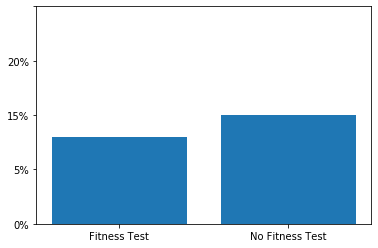

<Figure size 432x288 with 0 Axes>

In [102]:
# Percent of Visitors who Purchase 
ax = plt.subplot()
plt.bar(range(len(all_visitor_membership_pivot)), all_visitor_membership_pivot['Percentage of Membership'].values)
ax.set_xticks(range(len(all_visitor_membership_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '15%', '20%'])
plt.show()
plt.savefig('percent_all_visitors_purchase_barchart.png')